# Create roi

This notebook is used to create simplified synthetic data to run test and trials on the software.

In [4]:
import skimage.morphology
import skimage.io
import numpy as np
from microfilm.dataset import MultipageTIFF
import matplotlib.pyplot as plt
from roidynamics import splitmask

In [2]:
image_path = 'test_folders/test_multipage_good/'
image = MultipageTIFF(image_path)

## Single roi

In [3]:
roi = np.zeros(image.dims, dtype=np.uint8)
roi[70,90] = 1
roi = 255*skimage.morphology.binary_dilation(roi, skimage.morphology.disk(10)).astype(np.uint8)
skimage.io.imsave('test_folders/test_multipage_good/roi.bmp', roi, check_contrast=False)

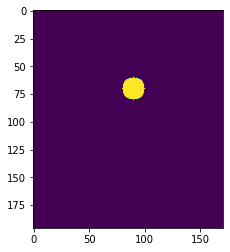

In [4]:
plt.imshow(roi);

## Multi roi

In [5]:
roi = np.zeros(image.dims, dtype=np.uint8)
roi[30,90] = 1
roi[90,50] = 1
roi[130,80] = 1
roi[90,130] = 1
roi = 255*skimage.morphology.binary_dilation(roi, skimage.morphology.disk(10)).astype(np.uint8)
skimage.io.imsave('test_folders/test_multipage_good/multiroi.bmp', roi, check_contrast=False)

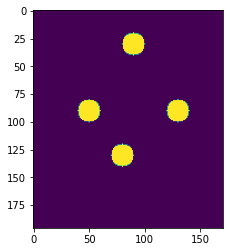

In [6]:
plt.imshow(roi);

## Generate masks

In [10]:
concentric_mask = splitmask.create_concentric_mask(center=[30,40], im_dims=[100,120], sector_width=4, num_sectors=3)
concentric_mask2 = splitmask.create_concentric_mask(center=[60,70], im_dims=[100,120], sector_width=4, num_sectors=3)


In [12]:
skimage.io.imsave('test_folders/concentric_mask_w4_n3_b.tif', concentric_mask2, check_contrast=False)

In [19]:
sector_mask = splitmask.create_sector_mask(center=[30,40], im_dims=[100,120], angular_width=20, max_rad=20, ring_width=None)
assert sector_mask.max() == 18, f"expected 18 sectors, got {sector_mask.max()}"

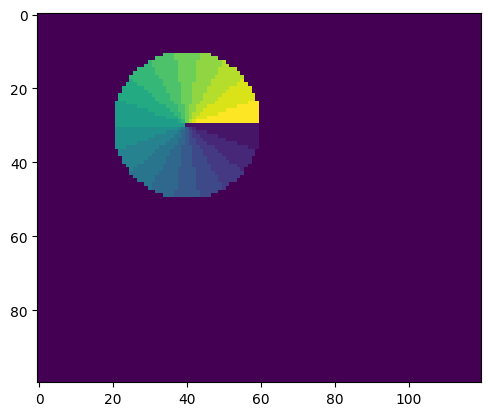

In [20]:
plt.imshow(sector_mask[0]);

In [26]:
sector_mask = splitmask.create_sector_mask(center=[30,40], im_dims=[100,120], angular_width=20, max_rad=20, ring_width=10)
assert np.sum(sector_mask[0][29,:]== 18) == 10, "Wrong ring diameter or value"

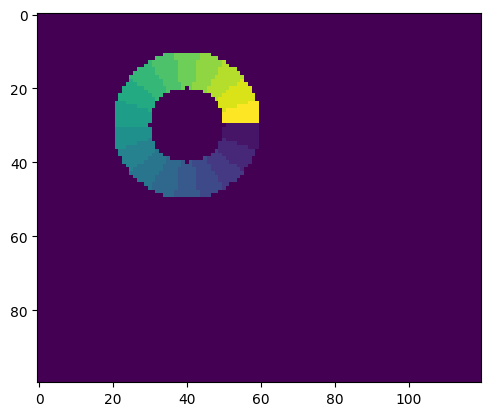

In [27]:
plt.imshow(sector_mask[0]);

## Intensities

In [39]:
xx, yy = np.meshgrid(np.arange(100), np.arange(120))

masks = []
rad = np.arange(0,20)
for r in rad:
    mask1 = np.sqrt((xx - 50) ** 2 + (yy - 50)**2) < r+5
    mask2 = np.sqrt((xx - 50) ** 2 + (yy - 50)**2) > r
    masks.append(100*np.logical_and(mask1, mask2))

masks = np.array(masks)

In [42]:
skimage.io.imsave('test_folders/concentric_time.tif', masks.astype(np.uint8), check_contrast=False)